# Linear Regression 
### Sophia Kramar

In [59]:
import matplotlib.pyplot as pt
import numpy as np
from sklearn import linear_model
import pandas as pd
import math

trainSet=pd.read_csv('input/train.csv')
print(trainSet.shape)
print(pd.DataFrame(trainSet).head(7))

(97, 2)
        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
5  8.3829  11.8860
6  7.4764   4.3483


Подключение всех библиотек, загрузка данных в переменные, формирование фреймов

In [60]:
X=trainSet[['x']]
Y=trainSet[['y']]
print(type(trainSet[['x']]))

<class 'pandas.core.frame.DataFrame'>


Выделение фреймов на сеты X и Y

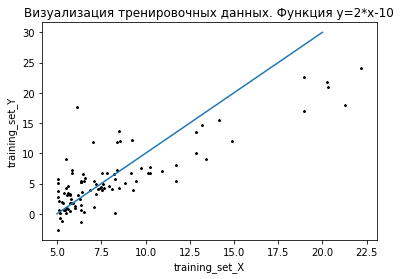

In [61]:
x = pd.DataFrame([5,20])
y = 2*x - 10
pt.title('Визуализация тренировочных данных. Функция y=2*x-10')
pt.scatter(X,Y,s=5,c='black',marker='*')
pt.plot(x, y)
pt.xlabel('training_set_X')
pt.ylabel('training_set_Y')
pt.show()

Визуализация линейных отношений между X и Y.


In [62]:
lm=linear_model.LinearRegression()
lm.fit(X,Y)
#print('Coeff of determination:',lm.score(X,Y))
#print('correlation is:',math.sqrt(lm.score(X,Y)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

lm.fit(X,Y) - обучение с учителем. Вычисляем долю дисперсии (коэф. детерминации) и коэф. корреляции, чтобы увидеть связь между двумя переменными (коэффициент корреляции) и степенью, в которой зависимые переменные могут быть предсказаны из независимой (коэффициент детерминации). Высокие значения обозначают сильную связь и сильную зависимость.

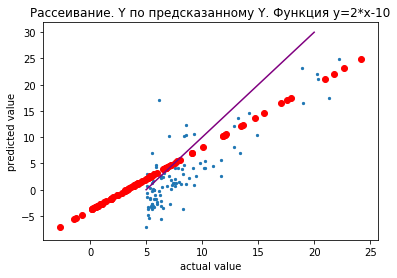

In [63]:
x = pd.DataFrame([5,20])
y = 2*x - 10
p = lm.predict(Y)
pt.title('Рассеивание. Y по предсказанному Y. Функция y=2*x-10')
pt.scatter(X, p, s=5)
pt.plot(x, y, c="purple")
pt.scatter(Y, p, c="red")
pt.xlabel('actual value')
pt.ylabel('predicted value')
pt.show()

lm.predict(Y) - предсказывание целевой переменной. Предсказанные значения выглядят похожими на тренировочные. Мы молодцы.

In [64]:
def computeCost(X,y,theta):
    """
    Берет numpy массив  X,y, theta и генерирует функцию стоимости, используя параметр тета в модели линейной регрессии
    """
    m=len(y)
    predict=X.dot(theta)
    square_err=(predict - y)**2
    
    return 1/(2*m) * np.sum(square_err)

data_n=trainSet.values
m=data_n[:,0].size
X_ofCost=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X_ofCost,y,theta)


32.072733877455676

Вычисление функции стоимости с помощью вычисления квадратичного отклонения. Вычисляет кост, используя параметр тета. 


## Gradient Descent
Принцип градиентного спуска - сведение функции $J(\Theta)$ к минимуму путём повторяющегося одновременного обновления выражений до тех пор, пока не будет покрытия.

By updating Equation and repeat unitil convergence

$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (единовременное обновление (!!!) $\Theta_j$ for all $j$)


In [65]:
def gradientDescent(X_ofCost,y,theta,alpha,num_iters):
    """
    Принимает numpy массив X, y, theta и обновляет theta путём постепенного спуска в num_iters итераций
    с learning rate равной alpha
    
    Возвращает theta и список функций стоимости для тета на каждой итерации
    """
    
    m=len(y)
    J_line=[]
    
    for i in range(num_iters):
        predictions = X_ofCost.dot(theta)
        error = np.dot(X_ofCost.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_line.append(computeCost(X_ofCost,y,theta))
    
    return theta, J_line

In [66]:
theta,J_line = gradientDescent(X_ofCost,y,theta,0.01,15000) #0.01 - альфа,1500 - итерации
print("h(x) ="+str(round(theta[0,0],4))+" + "+str(round(theta[1,0],4))+"*x")


h(x) =-3.8958 + 1.193*x


Вот такая получилась гипотеза. 

## Попробую  изобразить чашечку...

In [67]:
from mpl_toolkits.mplot3d import Axes3D

In [68]:
#Генерируем значения theta0, theta1 и результируещее значение стоимости
theta0_vals=np.linspace(-10,7,150)
theta1_vals=np.linspace(-1,4,150)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X_ofCost,y,t)

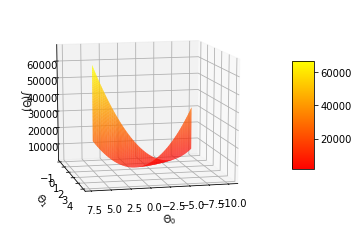

In [69]:
#Генерируем поверхность
fig = pt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="autumn")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(12,77)

Выглядит супер, надеюсь, что она правильная

## График $J(\Theta)$ 

Проверка эффективности количества итераций

Text(0.5, 1.0, 'График функции стоимости при градиентном спуске')

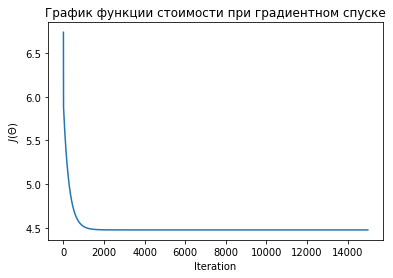

In [70]:
pt.plot(J_line)
pt.xlabel("Iteration")
pt.ylabel("$J(\Theta)$")
pt.title("График функции стоимости при градиентном спуске")


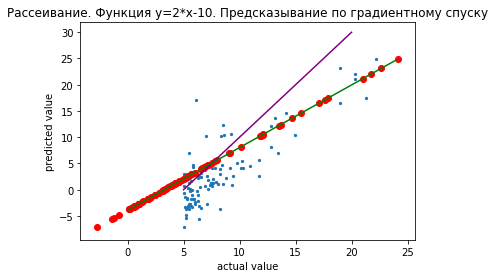

In [71]:
x = pd.DataFrame([5,20])
x_value=[x for x in range(25)]
y_value=[x*theta[1]+theta[0] for x in x_value]
y = 2*x - 10
p = lm.predict(Y)
pt.title('Рассеивание. Функция y=2*x-10. Предсказывание по градиентному спуску')
pt.scatter(X, p, s=5)
pt.plot(x, y, c="purple")
pt.scatter(Y, p, c="red")
pt.plot(x_value, y_value, c="green")
pt.xlabel('actual value')
pt.ylabel('predicted value')
pt.show()


Вот такая красота! Зелёным обозначена вычисленная нами h(x) =-3.8958 + 1.193*x